In [1]:
import sys
sys.path.append('C:/Users/mechadmin/Documents/GitHub/pyiga/nurbs_models')
from model_structure import NURBSGenerator
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from pyiga.geometry import *
from pyiga import approx, bspline

In [2]:
degree = 3
num_ctrlpts = 10
knotvector = np.concatenate(([0] * (degree + 1), np.linspace(0, 1, num_ctrlpts - degree), [1] * (degree + 1)))


In [3]:
print(knotvector)

[0.         0.         0.         0.         0.         0.16666667
 0.33333333 0.5        0.66666667 0.83333333 1.         1.
 1.         1.         1.        ]


In [4]:

degree = 3
n_kv = 52
# knotvector = np.concatenate(([0] * (degree + 1), np.linspace(0, 1, num_ctrlpts - degree), [1] * (degree + 1)))
knotvector = bspline.make_knots(1, 0.0, 1.0, n_kv)
num_ctrlpts = knotvector.numdofs
print(num_ctrlpts)
input_dim = 4  # Superformula parameters
output_dim = num_ctrlpts * 2 + num_ctrlpts  # Control points and weights
print(input_dim, output_dim, degree, num_ctrlpts)
# Initialize the model structure
model = NURBSGenerator(input_dim, output_dim, degree, num_ctrlpts)

# Load the saved model weights
model.load_state_dict(torch.load('C:\\Users\\mechadmin\\Documents\\GitHub\\pyiga\\nurbs_generator_50.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded successfully.")

# Use the model to generate NURBS control points and weights from new superformula parameters
new_params = torch.tensor([0.5, 18, 4, 0.3], dtype=torch.float32)
output = model(new_params)
ctrlpts, weights = output.split([num_ctrlpts*2, num_ctrlpts])
ctrlpts = ctrlpts.view(num_ctrlpts, 2)
weights = weights.view(num_ctrlpts)



# Calculate NURBS points using custom function
# nurbs_points = calculate_nurbs_points(ctrlpts, weights, knotvector, degree)
from pyiga.geometry import *
from pyiga import approx, bspline
from pyiga import bspline, assemble, vform, geometry, vis, solvers
ctrlpts_np = ctrlpts.detach().numpy()
weights_np = weights.detach().numpy()

nurbs = NurbsFunc((knotvector,), ctrlpts_np.copy(), weights=weights_np)
vis.plot_geo(nurbs,res=500, linewidth=None, color='black')
# plt.axis('equal');


53
4 159 3 53


C:\Users\mechadmin\AppData\Local\Temp\ipykernel_14392\2298904732.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:\\Users\\mechadmin\

RuntimeError: Error(s) in loading state_dict for NURBSGenerator:
	Missing key(s) in state_dict: "fc.12.weight", "fc.12.bias", "fc.16.weight", "fc.16.bias", "fc.20.weight", "fc.20.bias". 
	Unexpected key(s) in state_dict: "fc.2.weight", "fc.2.bias", "fc.6.weight", "fc.6.bias". 
	size mismatch for fc.0.weight: copying a param with shape torch.Size([128, 4]) from checkpoint, the shape in current model is torch.Size([256, 4]).
	size mismatch for fc.0.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for fc.8.weight: copying a param with shape torch.Size([159, 256]) from checkpoint, the shape in current model is torch.Size([1024, 512]).
	size mismatch for fc.8.bias: copying a param with shape torch.Size([159]) from checkpoint, the shape in current model is torch.Size([1024]).

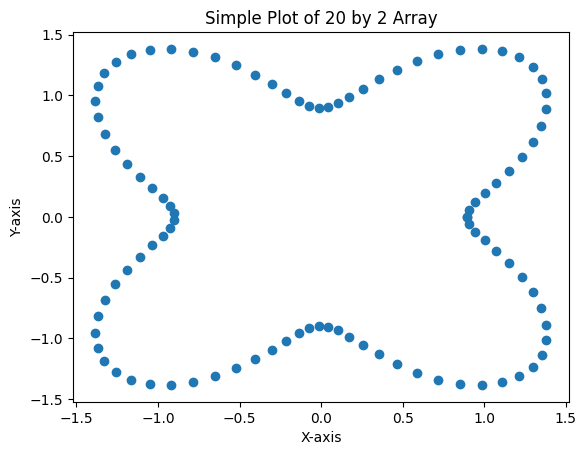

In [5]:
def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(r, L0, n, a=0.5, d=1, num_res=100):
    theta = np.linspace(0, 2 * np.pi, num_res)
    c = cal_c(r,a,L0)
    result = c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return np.vstack((x, y)).T
res = superformula(0.5, 20, 4, 0.3)
# Plot the data
plt.plot(res[:, 0], res[:, 1], 'o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot of 20 by 2 Array')
plt.show()


In [6]:
print(weights)

tensor([-35.1783, -30.8767, -12.0453,  23.3412,  25.4249,   4.0088, -12.0077,
        -48.2574, -30.1219, -10.1995, -25.8420, -13.8692,  -5.4734, -23.5346,
        -24.2494, -16.3129,  -7.4126, -20.1053, -29.1033,   3.5566,  19.0073,
          8.4806,  13.3614,  46.4107,  14.2721,   0.8668, -21.0554, -43.6952,
        -35.2412, -43.1139, -36.2816,  -2.0769, -49.3687,  -4.5572,   2.5704,
         11.3983,  36.7568,  -1.1054, -15.5086,   3.6873,  69.2682,   7.1094,
         17.4737,   1.5949,   5.7537,  16.4249,  14.9753,   7.9432,  -1.2373,
        -47.7312, -18.6028,  -6.8276, -10.2831], grad_fn=<ViewBackward0>)


In [7]:
print(len(ctrlpts_np[0]))

2


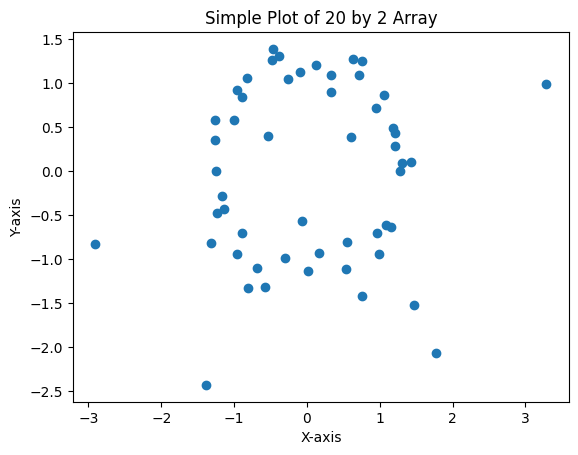

In [8]:

# Plot the data
plt.plot(ctrlpts_np[:, 0], ctrlpts_np[:, 1], 'o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot of 20 by 2 Array')
plt.show()


In [9]:
def basis_function(i, k, u, knot_vector):
    if k == 0:
        return 1.0 if knot_vector[i] <= u < knot_vector[i + 1] else 0.0
    else:
        denom1 = knot_vector[i + k] - knot_vector[i]
        denom2 = knot_vector[i + k + 1] - knot_vector[i + 1]
        term1 = ((u - knot_vector[i]) / denom1) * basis_function(i, k - 1, u, knot_vector) if denom1 != 0 else 0
        term2 = ((knot_vector[i + k + 1] - u) / denom2) * basis_function(i + 1, k - 1, u, knot_vector) if denom2 != 0 else 0
        return term1 + term2

def calculate_nurbs_points(ctrlpts, weights, knotvector, degree, num_points=100, epsilon=1e-6):
    u_values = np.linspace(knotvector[degree], knotvector[-degree-1], num_points)
    nurbs_points = []
    for u in u_values:
        numerator = torch.zeros(2, dtype=ctrlpts.dtype, device=ctrlpts.device)
        denominator = torch.tensor(0.0, dtype=ctrlpts.dtype, device=ctrlpts.device)
        for i in range(len(ctrlpts)):
            b = basis_function(i, degree, u, knotvector)
            numerator += b * weights[i] * ctrlpts[i]
            denominator += b * weights[i]
        nurbs_points.append(numerator / (denominator + epsilon))
    return torch.stack(nurbs_points)

In [10]:
print(knotvector.kv)

[0.         0.         0.01923077 0.03846154 0.05769231 0.07692308
 0.09615385 0.11538462 0.13461538 0.15384615 0.17307692 0.19230769
 0.21153846 0.23076923 0.25       0.26923077 0.28846154 0.30769231
 0.32692308 0.34615385 0.36538462 0.38461538 0.40384615 0.42307692
 0.44230769 0.46153846 0.48076923 0.5        0.51923077 0.53846154
 0.55769231 0.57692308 0.59615385 0.61538462 0.63461538 0.65384615
 0.67307692 0.69230769 0.71153846 0.73076923 0.75       0.76923077
 0.78846154 0.80769231 0.82692308 0.84615385 0.86538462 0.88461538
 0.90384615 0.92307692 0.94230769 0.96153846 0.98076923 1.
 1.        ]


In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from pyiga import approx, bspline
knotvector = knotvector.kv
knotvector = np.append(knotvector,[1.0,1.0])
nurbs_points = calculate_nurbs_points(ctrlpts, weights, knotvector, degree)
criterion = nn.MSELoss()
# Calculate loss
superformula_pts = res


In [12]:
import numpy as np

# Example data sets
actual = superformula_pts[:nurbs_points.shape[0]]
predicted = nurbs_points.detach().numpy()

# Compute Mean Squared Error
mse = np.mean((actual - predicted) ** 2)

print(f"MSE: {mse}")


MSE: 0.057560432696146524


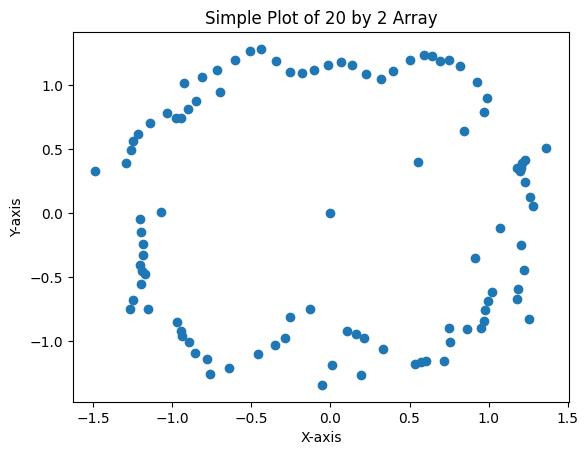

In [13]:
predicted.shape
# Plot the data
plt.plot(predicted[:, 0], predicted[:, 1], 'o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot of 20 by 2 Array')
plt.show()